# **connect drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installation Libraries**

In [2]:
!pip install shap         # For elucidating model predictions using feature attribution techniques
!pip install ruptures     # Used to identify sudden shifts or changes in time series data
!pip install fastdtw      # Effective way to compute Dynamic Time Warping between sequences
!pip install tslearn      # Time series machine learning toolkit for applications like classification and clustering

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-linux_x86_64.whl size=542096 sha256=080c766206d13b972008a8cd6e8e5acaf87d77bedafd7763d52c7edb168f4030
  Stored in directory: /root/.cache/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.6 MB/s eta 0:00:00


# **Import libraries**

In [3]:
#importing panda libary for structure data and handle
import pandas as pdx
#It is used for numerical computasion
import numpy as npx
#for using visulaixzation and statical plot
import matplotlib.pyplot as pltx
#it is used for advanced statics plot
import seaborn as sns
#for using scaled features value of mean
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# used for features selections
from sklearn.decomposition import PCA
#perform for non linear dimension reduction and higer data.
from sklearn.manifold import TSNE
#used for splittng data
from sklearn.model_selection import train_test_split
#Rf for using classifiaction esemble learning
from sklearn.ensemble import RandomForestClassifier
# Open Scikit-Learn and import the Support Vector Machine module.
from sklearn import svm
#it is used for classification and regression problem
from sklearn import svm
#it shows the evaluation matric performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score
# define a classifcationn report of evaluation matric
from sklearn.metrics import classification_report
#it show summary of classifiaction output
from sklearn.metrics import confusion_matrix
#for identifies abrupt change or shft in time series data
import ruptures as rpt
#this shows detect anomoly
from sklearn.ensemble import IsolationForest
#calculated line between two data point
from scipy.spatial.distance import euclidean
#compute approx dynamic timewrapping distance
from fastdtw import fastdtw
# To convert category labels into numeric format
from sklearn.preprocessing import LabelEncoder
#compute roc curve
from sklearn.metrics import roc_curve, auc
#apply k mean cluster to time series data
from tslearn.clustering import TimeSeriesKMeans
#calculate dynamic time wraaping
from tslearn.metrics import dtw
#using for normalize time series data
from tslearn.preprocessing import TimeSeriesScalerMinMax
#used for component visulaization graph
from matplotlib.patches import Patch
#bring model prediction by shap
import shap
# removing unwantted warning
import warnings
warnings.filterwarnings('ignore')


# **Load the dataset**

In [4]:
dfanomoly=pdx.read_csv('/content/drive/MyDrive/network_dataset.csv')
dfanomoly.head()

,timestamp,bandwidth,throughput,congestion,packet_loss,latency,jitter,Routers,Planned route,Network measure,Network target,Video target,Percentage video occupancy,Bitrate video,Number videos
0,2024-05-11 12:00:15,2,2.15,0.38,0.0,6.58,0.52,up xrv6,Best effort,S1,S2,NaN,0,0,0
1,2024-05-11 12:00:43,2,2.16,0.12,0.0,5.36,0.34,up xrv6,Best effort,S1,S2,NaN,0,0,0
2,2024-05-11 12:01:12,2,2.00,0.08,0.0,6.29,0.23,up xrv6,Best effort,S1,S2,NaN,0,0,0
3,2024-05-11 12:01:40,2,2.07,0.07,0.0,5.91,0.51,up xrv6,Best effort,S1,S2,NaN,0,0,0
4,2024-05-11 12:02:08,2,2.40,0.08,0.0,5.81,0.71,up xrv6,Best effort,S1,S2,NaN,0,0,0


In [5]:
dfanomoly.shape

(1001, 15)

In [6]:
dfanomoly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   1001 non-null   object 
 1   bandwidth                   1001 non-null   int64  
 2   throughput                  1001 non-null   float64
 3   congestion                  1001 non-null   float64
 4   packet_loss                 1001 non-null   float64
 5   latency                     1001 non-null   float64
 6   jitter                      1001 non-null   float64
 7   Routers                     1001 non-null   object 
 8   Planned route               1001 non-null   object 
 9   Network measure             1001 non-null   object 
 10  Network target              1001 non-null   object 
 11  Video target                701 non-null    object 
 12  Percentage video occupancy  1001 non-null   int64  
 13  Bitrate video               1001 

# **Perform EDA**

# **Drop the irrevalent columns**

In [7]:
dfanomoly.isnull().sum()

,0
timestamp,0
bandwidth,0
throughput,0
congestion,0
packet_loss,0
latency,0
jitter,0
Routers,0
Planned route,0
Network measure,0


# checking the statical measure of dataset

In [8]:
dfanomoly.describe()

,bandwidth,throughput,congestion,packet_loss,latency,jitter,Percentage video occupancy,Bitrate video,Number videos
count,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,2.0,1.912068,23.860869,5.437063,54.757882,0.863946,28.981019,483.983017,1.182817
std,0.0,0.906711,32.148883,9.659324,275.627392,0.899952,37.075068,619.153629,1.113348
min,2.0,0.050000,0.030000,0.000000,4.480000,0.000000,0.000000,0.000000,0.000000
25%,2.0,1.430000,0.090000,0.000000,6.000000,0.480000,0.000000,0.000000,0.000000
50%,2.0,1.980000,10.740000,0.000000,7.550000,0.650000,10.000000,167.000000,1.000000
75%,2.0,2.460000,40.890000,7.500000,10.290000,0.940000,50.000000,835.000000,2.000000
max,2.0,7.140000,134.370000,52.500000,3051.580000,10.800000,120.000000,2004.000000,6.000000


In [9]:
#  unique value throughput

print("Unique values in 'throughput':", dfanomoly['throughput'].unique())


Unique values in 'throughput': [2.15 2.16 2.   2.07 2.4  2.05 1.89 2.66 1.85 2.24 1.83 1.44 2.27 2.37
 2.64 1.97 2.03 1.62 1.77 1.73 2.21 2.67 2.71 2.47 2.22 2.12 2.26 2.48
 1.92 1.42 2.82 2.65 3.6  1.86 2.43 2.11 2.09 2.72 2.46 1.96 1.38 2.13
 1.95 1.67 1.88 2.75 2.7  2.01 1.87 1.91 2.34 1.33 1.41 3.36 2.77 1.7
 1.76 1.63 2.62 2.55 1.94 2.49 3.35 1.78 2.14 1.61 2.52 2.69 1.58 2.57
 2.73 2.39 1.99 1.71 2.08 2.78 2.58 2.41 2.31 2.45 2.23 2.35 1.98 2.5
 2.04 2.61 2.79 1.57 2.17 2.59 1.43 1.39 1.75 2.36 2.63 1.84 1.9  3.22
 2.32 2.44 1.72 2.18 2.02 2.06 1.69 2.29 2.42 1.47 3.03 1.51 1.74 3.3
 7.14 1.45 2.89 0.39 1.14 0.92 3.75 0.42 1.12 0.96 0.61 0.91 1.23 1.32
 0.88 0.3  1.22 2.68 0.37 0.32 0.72 0.69 0.58 0.22 0.74 0.29 0.21 0.52
 1.28 0.14 0.45 1.07 1.18 0.67 0.13 0.12 1.27 2.76 0.19 0.11 1.48 0.36
 0.62 0.28 1.25 1.3  2.19 1.26 3.34 3.01 3.51 1.8  2.33 2.28 1.29 1.49
 3.2  2.51 1.56 1.46 2.81 0.7  1.11 0.35 2.54 0.33 0.2  1.35 0.43 0.41
 0.65 0.51 0.57 0.64 1.16 2.2  2.95 2.6  1.93 1.6

In [11]:
# Define a function that divides throughput values into two groups.
# Throughput values ≤ 1 are included in Class 0, whereas values > 1 are included in Class 1.
def classify_throughput(value):
    if value <= 1:
        return 0  # Class 0: "0-0.5" and "0.5-1"
    else:
        return 1  # Class 1: "1-1.5" and "1.5+"

# Create a new column called "throughput_class" and apply the classification algorithm to the "throughput" column.
dfanomoly['throughput_class'] = dfanomoly['throughput'].apply(classify_throughput)

# In the newly generated 'throughput_class' column, show the number of each class.
print(dfanomoly['throughput_class'].value_counts())

throughput_class
1    838
0    163
Name: count, dtype: int64


# **Data visualization**

# **Heat map**

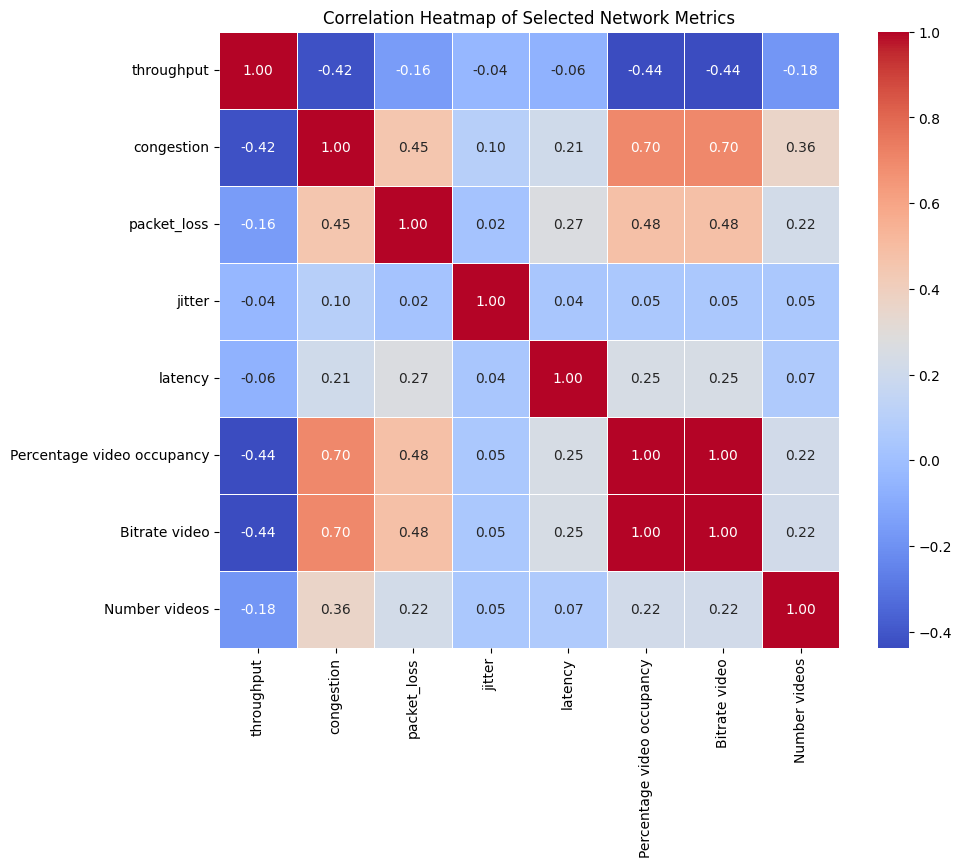

In [12]:
# Column list to be displayed in the heatmap
heatmap_cols = ['throughput', 'congestion', 'packet_loss', 'jitter', 'latency', 'Percentage video occupancy', 'Bitrate video', 'Number videos']

# Remove any columns that aren't present in the DataFrame to prevent mistakes.
heatmap_cols = [col for col in heatmap_cols if col in dfanomoly.columns]

# Take only the pertinent columns out of the original DataFrame.
dfanomoly_heatmap = dfanomoly[heatmap_cols]

# The corelation matrx betwen the chosen network-related characteristics should be calculated.
corr_matrix = dfanomoly_heatmap.corr()

# Establish the heatmap plot's fig size
pltx.figure(figsize=(10, 8))

# Create a heatmap to show the feature correlations' direction and intensity.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# For reference, provide a tittle in the heatmap.
pltx.title('Correlation Heatmap of Selected Network Metrics')

# Make the heatmap plott visible.
pltx.show()


# **TSE visualization**

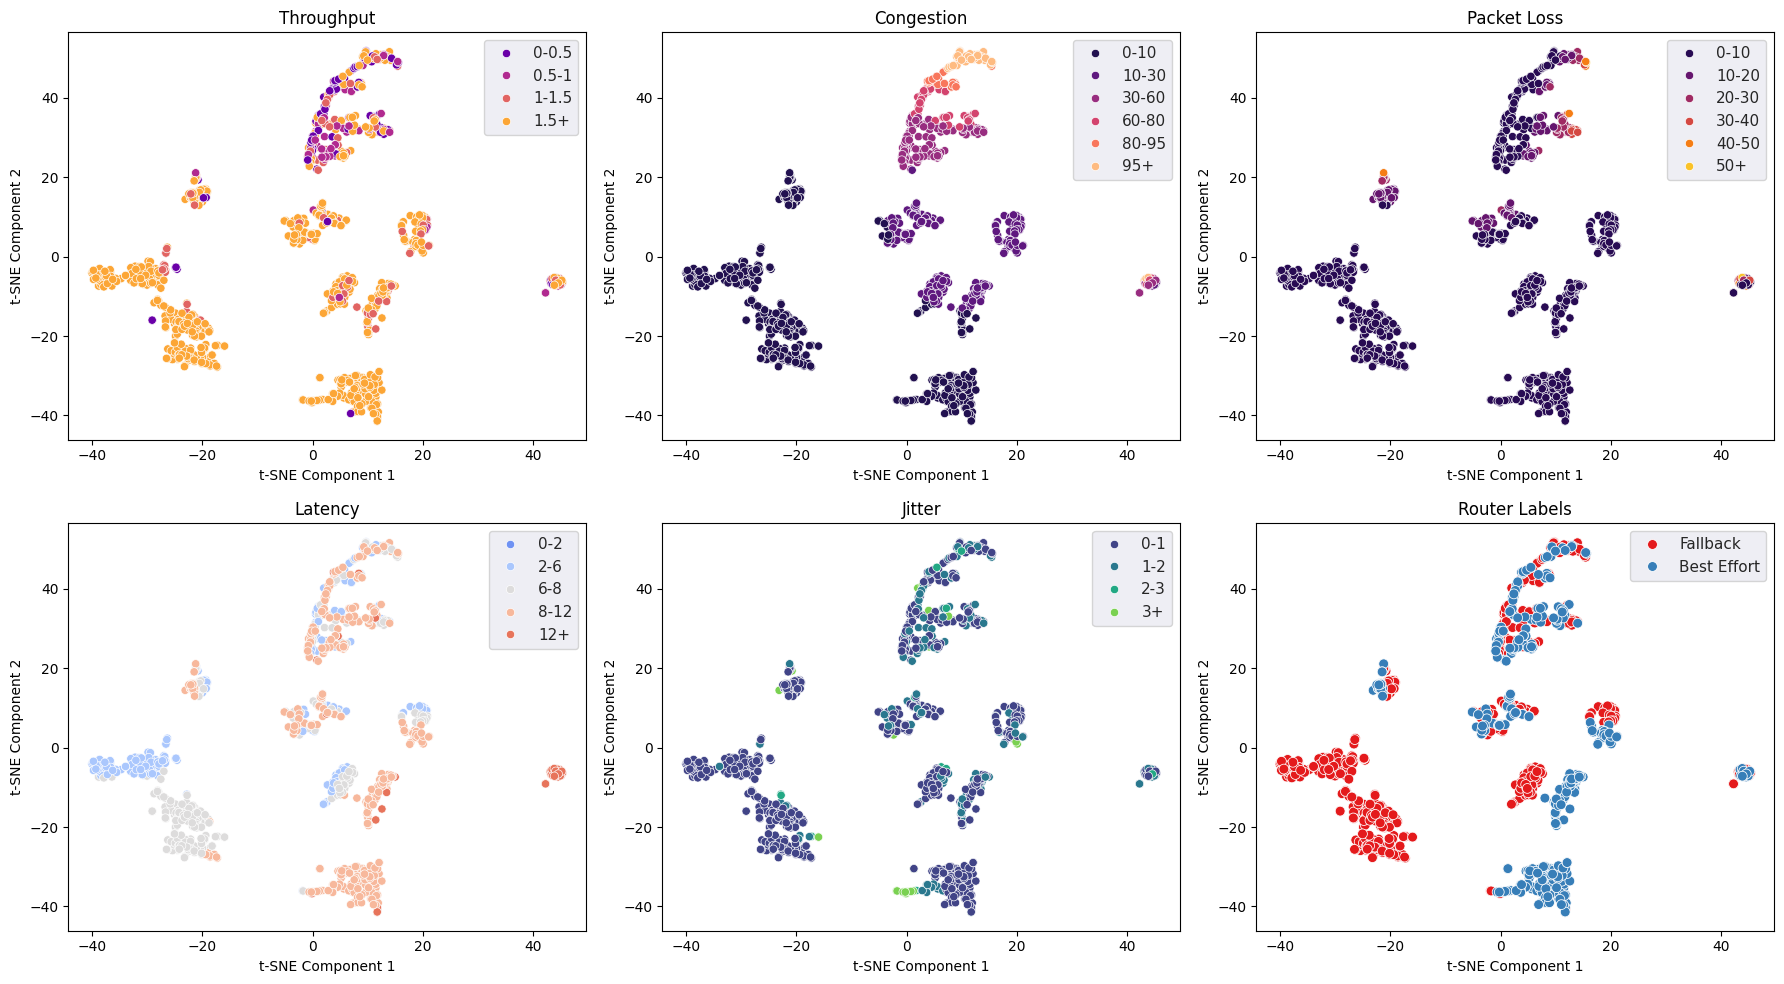

In [13]:
# To reduce non-linear dimensionality, import t-SNE.
from sklearn.manifold import TSNE

# Specify the characteristics that should be utilised with t-SNE.
features = ['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']

# To protect the original data, create a replica of the dataset.
dfanomoly_original = dfanomoly.copy()

# Verify that the copy we are using has the necessary columns.
X = dfanomoly_original[features]

# Set up t-SNE with a fixed random seed and two output dimensions.
tsne = TSNE(n_components=2, random_state=42)

# Reduce the feature dimensions to 2 by using t-SNE.
tsne_results = tsne.fit_transform(X)

# To visualise the results, add the t-SNE components back to the DataFrame.
dfanomoly_original['tsne-2d-one'] = tsne_results[:, 0]
dfanomoly_original['tsne-2d-two'] = tsne_results[:, 1]

# Make throughput value bins for colour grouping in plots
dfanomoly_original['throughput_bin'] = pdx.cut(dfanomoly_original['throughput'], bins=[-npx.inf, 0.5, 1, 1.5, npx.inf], labels=["0-0.5", "0.5-1", "1-1.5", "1.5+"])
# Make congestion value bins to classify them for plotting
dfanomoly_original['congestion_bin'] = pdx.cut(dfanomoly_original['congestion'], bins=[-npx.inf, 10, 30, 60, 80, 95, npx.inf], labels=["0-10", "10-30", "30-60", "60-80", "80-95", "95+"])
# Make packet loss value bins to allow for grouped visualization
dfanomoly_original['packet_loss_bin'] = pdx.cut(dfanomoly_original['packet_loss'], bins=[-npx.inf, 10, 20, 30, 40, 50, npx.inf], labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50+"])
# Make latency value bins to provide meaningful ranges
dfanomoly_original['latency_bin'] = pdx.cut(dfanomoly_original['latency'], bins=[-npx.inf, 2, 6, 8, 12, npx.inf], labels=["0-2", "2-6", "6-8", "8-12", "12+"])
# To make visualising categories easier, create bins for jitter values.
dfanomoly_original['jitter_bin'] = pdx.cut(dfanomoly_original['jitter'], bins=[-npx.inf, 1, 2, 3, npx.inf], labels=["0-1", "1-2", "2-3", "3+"])

# Transform router status messages into easily accessible category names
# Swap out router IDs with labels that are readable by humans.
dfanomoly_original['Routers'] = dfanomoly_original['Routers'].replace({
    'up xrv1,2,3': 'Best Effort',
    'up xrv6': 'Fallback'
})

# Create a 2x3 grid so that you may plot several scatter plots.
fig, axs = pltx.subplots(2, 3, figsize=(18, 10))

# Use a same aesthetic for all seaborn plots.
sns.set(style="darkgrid")

# Plot throughput categories with components of t-SNE
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='throughput_bin', data=dfanomoly_original, ax=axs[0, 0], palette='plasma', legend='full').set_title('Throughput')

# Use t-SNE components to plot the different types of congestion.
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='congestion_bin', data=dfanomoly_original, ax=axs[0, 1], palette='magma', legend='full').set_title('Congestion')

# Plot packet loss categories with components of t-SNE
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='packet_loss_bin', data=dfanomoly_original, ax=axs[0, 2], palette='inferno', legend='full').set_title('Packet Loss')

# Plot latency categories with components of t-SNE
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='latency_bin', data=dfanomoly_original, ax=axs[1, 0], palette='coolwarm', legend='full').set_title('Latency')

# Plot jitter categories with components of t-SNE
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='jitter_bin', data=dfanomoly_original, ax=axs[1, 1], palette='viridis', legend='full').set_title('Jitter')

# Plot router kinds with t-SNE components, such as Fallback and Best Effort.
sns.scatterplot(
    x='tsne-2d-one',
    y='tsne-2d-two',
    hue='Routers',
    data=dfanomoly_original,
    palette='Set1',
    legend='full',
    s=50
).set_title('Router Labels')

# Automatically change the distance between subplots to improve readability
pltx.tight_layout()

# Put legends in the best possible positions and assign x and y labels to each subplot.
for ax in axs.flat:
    ax.set(xlabel='t-SNE Component 1', ylabel='t-SNE Component 2')
    ax.legend(loc='best')

# Make the last layout changes and render the entire visualisation.
pltx.tight_layout()
pltx.show()


# **Jitter Comparision best effort vs fallback route**

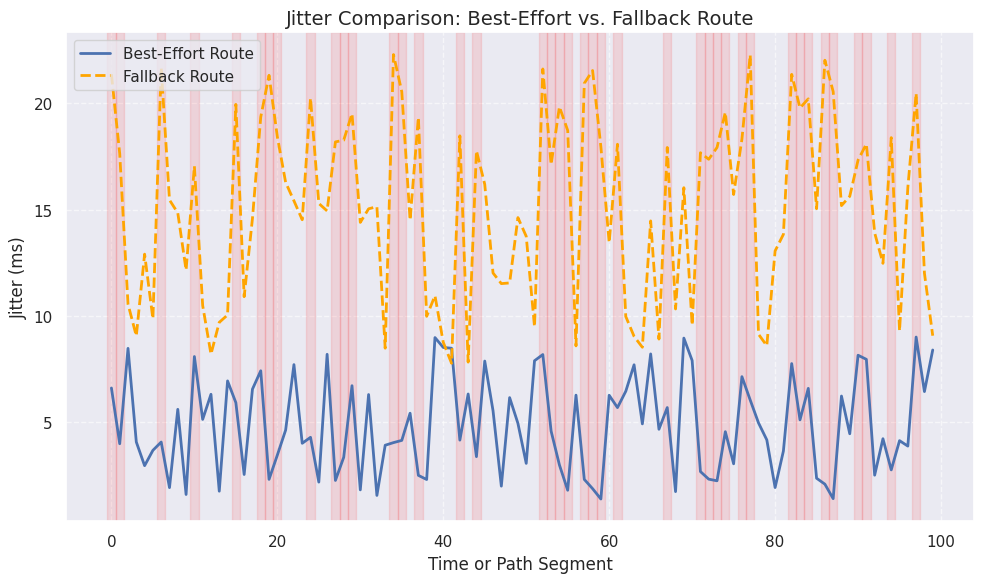

In [14]:
# Simulate data (substitute your real dataset).
num_points = 100

# Create router counts for the path with the best effort (fewer routers).
routers_best_effort = npx.random.randint(1, 5, num_points)

# Create a fallback path router count, which is usually more routers.
routers_fallback = npx.random.randint(3, 8, num_points)

# Use additional noise to simulate jitter for the best-effort path, according to the number of routers.
jitter_best_effort = routers_best_effort * 2 + npx.random.normal(0, 0.5, num_points)

# Increase proportionality and noise to simulate jitter for the backup path.
jitter_fallback = routers_fallback * 3 + npx.random.normal(0, 0.8, num_points)

# Set the plot's initial figure size.
pltx.figure(figsize=(10, 6))

# Use a solid blue line to plot jitter values for the best-effort path.
pltx.plot(jitter_best_effort, 'b-', label='Best-Effort Route', linewidth=2)

# Draw a dashed orange line to represent the fallback path's jitter values.
pltx.plot(jitter_fallback, 'orange', linestyle='--', label='Fallback Route', linewidth=2)

# To show congestion or instability, highlight the parts with a high backup router count.
for i in range(num_points):
    if routers_fallback[i] >= 6:  # Threshold for "high" router count
        pltx.axvspan(i - 0.5, i + 0.5, color='red', alpha=0.1)

# Designate a time or route segment on the x-axis.
pltx.xlabel('Time or Path Segment', fontsize=12)

# Indicate jitter in milliseconds on the y-axis.
pltx.ylabel('Jitter (ms)', fontsize=12)

# Give the plot a meaningful title.
pltx.title('Jitter Comparison: Best-Effort vs. Fallback Route', fontsize=14)

# Include a legend to help differentiate between paths.
pltx.legend()

# Make grid lines visible for easier reading.
pltx.grid(True, linestyle='--', alpha=0.6)

# Arrange the spacing to avoid layout overlap.
pltx.tight_layout()

# Save the figure as a high-resolution PNG file
pltx.savefig('jitter_comparison.png', dpi=300)

# Show the finished plot
pltx.show()


In [15]:
# To choose features, use PCA.
# For PCA, choose just numerical columns.
metrics = ['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']

# Take values out of certain characteristics without transforming them into three dimensions.
X = dfanomoly[metrics].values

# To keep the top five main components, initialise PCA.
pca = PCA(n_components=5)

# Run PCA on the numerical characteristics that were chosen.
X_pca = pca.fit_transform(X)

# Construct a DataFrame using the primary components that are obtained.
dfanomoly_pca = pdx.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Perform further analysis or modelling using the modified PCA features.
# Set the goal variable to the 'throughput' column.
y = dfanomoly['throughput']

# Include the target variable in the DataFrame that has undergone PCA transformation.
dfanomoly_pca['target'] = y


# **Isolation forest anomaly detection Score**

Number of anomalies detected: 142


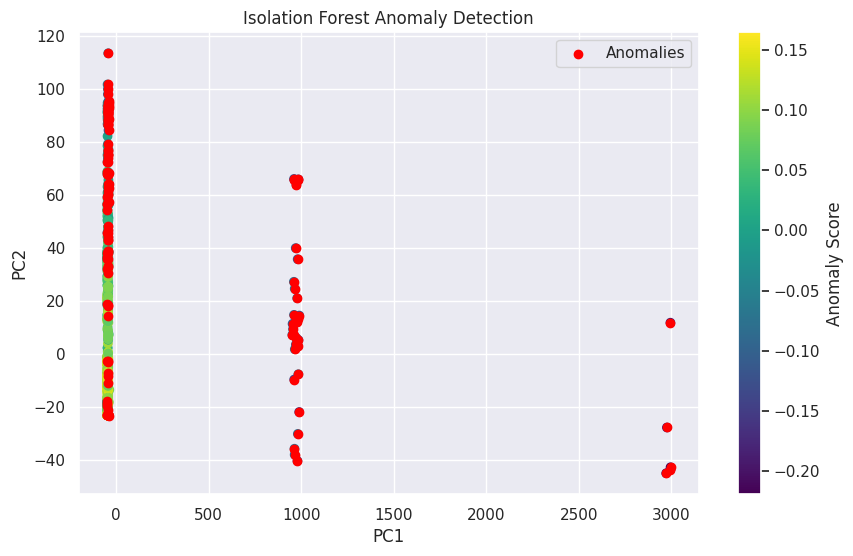

In [16]:
# Taking the preprocessed data to be in dfanomoly_pca
# Take off the target column so that anomaly detection can only utilise features.
X_iforest = dfanomoly_pca.drop('target', axis=1)

# To discover outliers, initialise the Isolation Forest model.
# For repeatability, set the contamination threshold and random seed.
model = IsolationForest(contamination='auto', random_state=42)

# The Isolation Forest model is trained using the feature set.
model.fit(X_iforest)

# Calculate each data point's anomaly score.
dfanomoly_pca['anomaly_score'] = model.decision_function(X_iforest)

# Determine if each point represents a normal (1) or anomalous (-1) situation.
dfanomoly_pca['anomaly'] = model.predict(X_iforest)

# Remove the data points categorised as abnormalities.
anomalies = dfanomoly_pca[dfanomoly_pca['anomaly'] == -1]

# Show the overall quantity of anomalies found.
print("Number of anomalies detected:", len(anomalies))

# Define the size of the plot area.
pltx.figure(figsize=(10, 6))

# Plot every data point using PC1 and PC2, labelling them with the anomalous score.
# Then, add a colour bar to display the anomaly score scale.
pltx.scatter(dfanomoly_pca['PC1'], dfanomoly_pca['PC2'], c=dfanomoly_pca['anomaly_score'], cmap='viridis')
pltx.colorbar(label='Anomaly Score')

# Underline the abnormalities that have been found in red.
pltx.scatter(anomalies['PC1'], anomalies['PC2'], color='red', label='Anomalies')

# Assign the first principle component label to the x-axis.
pltx.xlabel('PC1')

# Indicate the second primary component on the y-axis.
pltx.ylabel('PC2')

# Give the story a title that explains it.
pltx.title('Isolation Forest Anomaly Detection')

# Display the legend to distinguish oddities
pltx.legend()

# Make the final visualisation.
pltx.show()


# **K-Means Clustering with DTW**

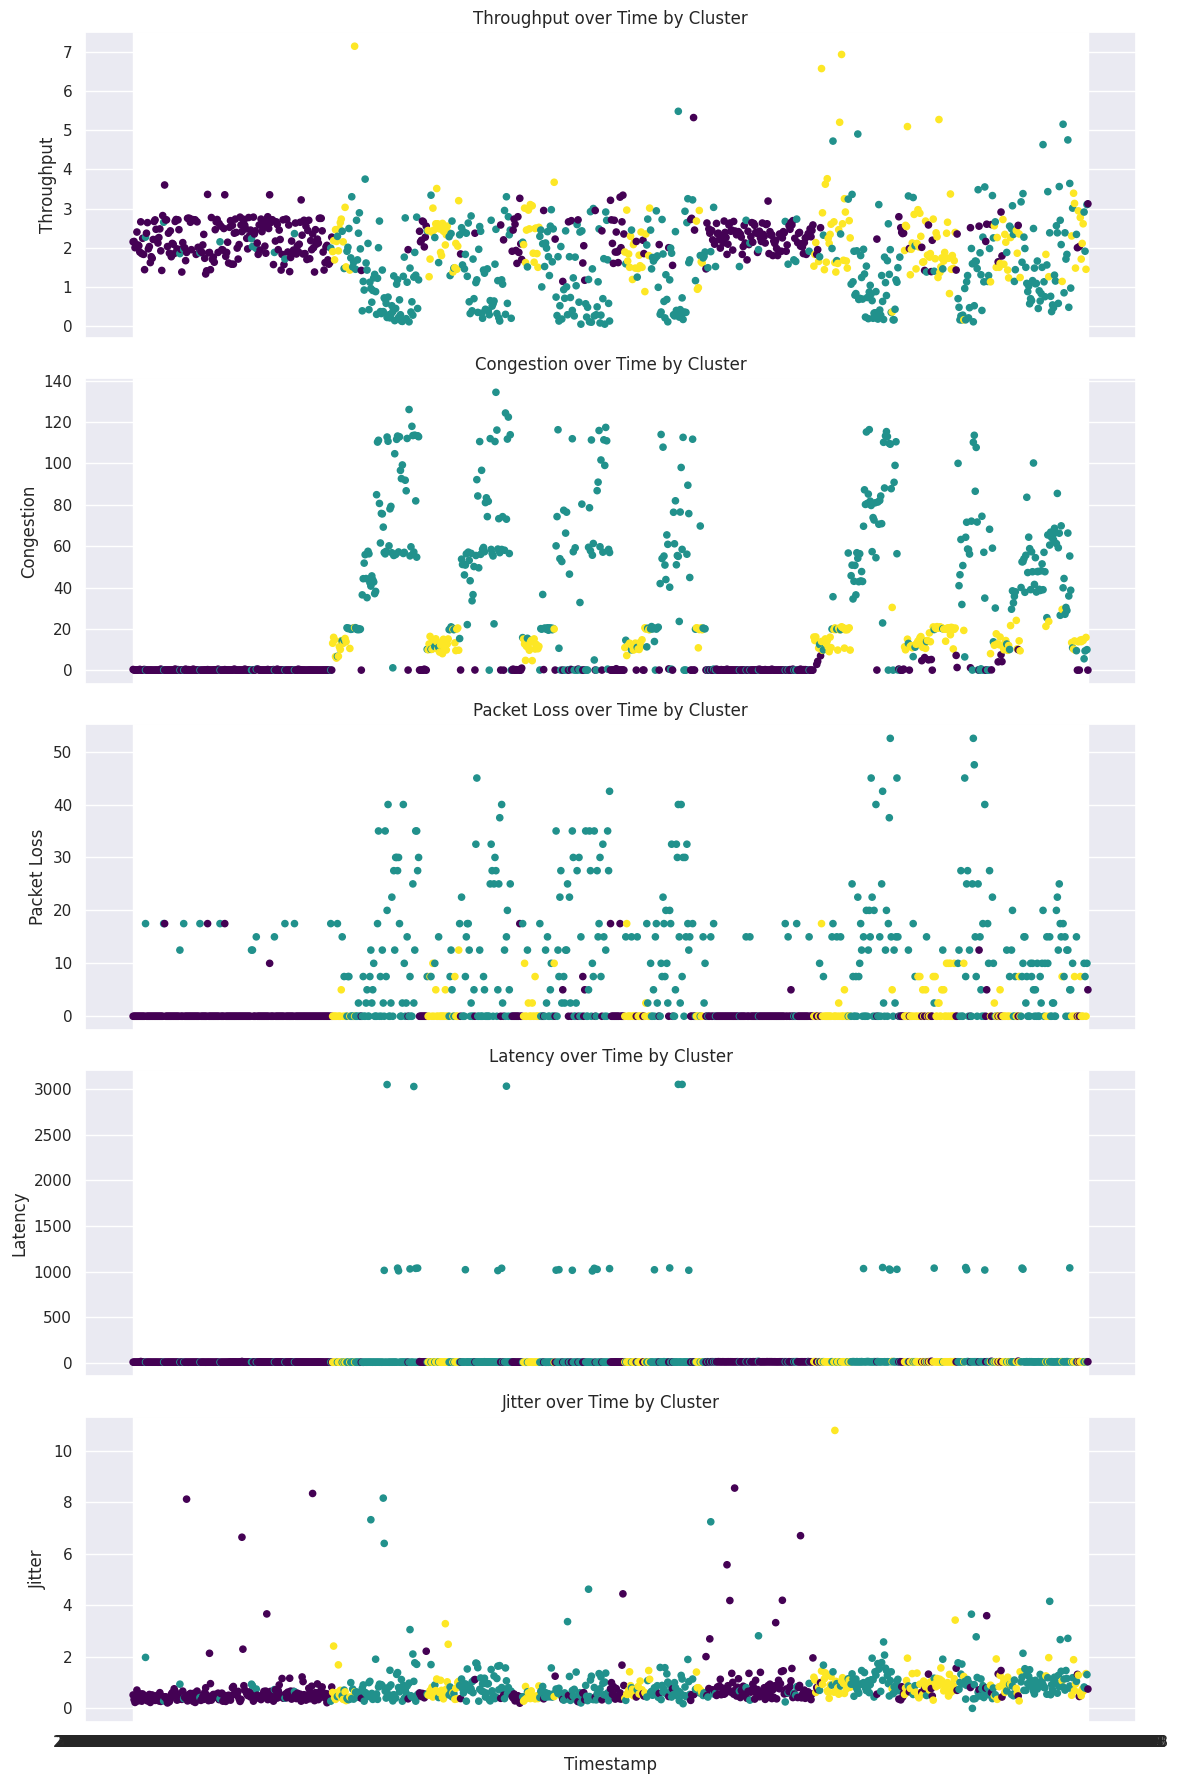

In [17]:
# Establish the set of time series metrics that will be employed in the clustering.
metrics = ['throughput', 'congestion', 'packet_loss', 'latency', 'jitter']

# Convert the feature matrix into the 3D format needed for clustering time series.
X = dfanomoly[metrics].values.reshape(-1, len(metrics), 1)

# Use Min-Max scaling to standardise every time series' features.
X_scaled = TimeSeriesScalerMinMax().fit_transform(X)

# DTW (Dynamic Time Warping) is used as the distance metric to initialise k-means clustering.
kmeans_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
# The model is then fitted to the scaled data and cluster labels are assigned.
clusters = kmeans_dtw.fit_predict(X_scaled)
# The final cluster labels are then added back to the original DataFrame.
dfanomoly['cluster'] = clusters

# Assemble a vertical stack of subplots for every measurement.
fig, axs = pltx.subplots(len(metrics), 1, figsize=(12, 18), sharex=True)

# Plot each metric in a loop against time, colouring each point according to its cluster assignment.
# Give the y-axis a formatted metric name, such as
# Indicate which metric is being plotted in the title.
for i, metric in enumerate(metrics):
    axs[i].scatter(dfanomoly['timestamp'], dfanomoly[metric], c=dfanomoly['cluster'], cmap='viridis', s=20)
    axs[i].set_ylabel(metric.replace('_', ' ').title())
    axs[i].set_title(f"{metric.replace('_', ' ').title()} over Time by Cluster")

# On the final subplot, mark the x-axis with timestamps.
axs[-1].set_xlabel("Timestamp")

# To improve arrangement, change the distance between plots.
pltx.tight_layout()

# Show the finished clustered time series visualisation.
pltx.show()


# **Change Point Detection (Using Ruptures)**

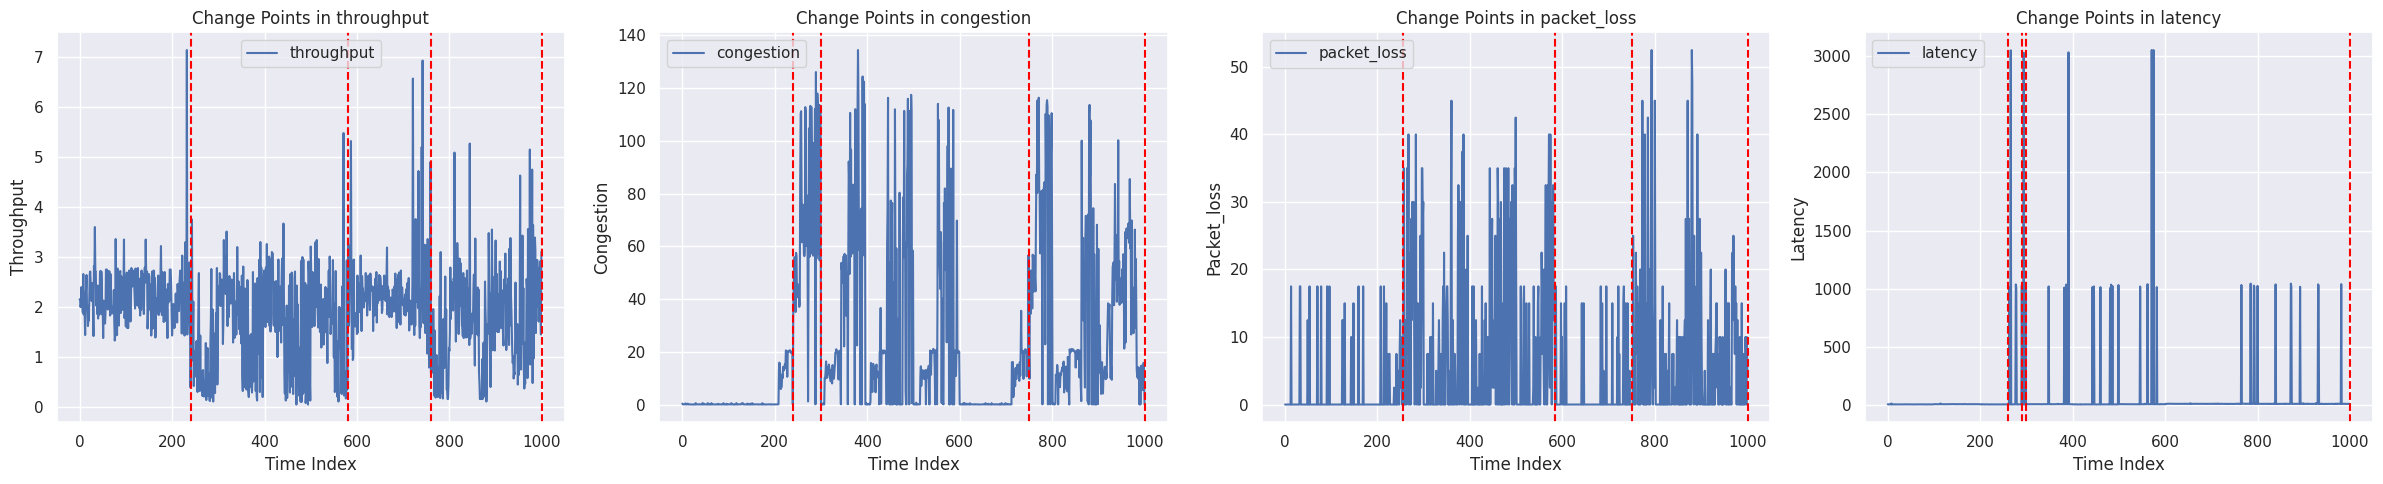

In [18]:
# For the purpose of preserving the raw data, make a replica of the original DataFrame.
dfanomoly_original = dfanomoly.copy()

# Create a function to identify time series change points
# Apply the dynamic programming technique using the given model
# Provide the identified change point indices
def detect_change_points(series, model="l2", n_bkps=3):
    algo = rpt.Dynp(model=model).fit(series)
    result = algo.predict(n_bkps=n_bkps)
    return result

# A list of performance indicators to look for shifts
metrics = ['throughput', 'congestion', 'packet_loss', 'latency']

# For every measure, create a horizontal row of subplots.
fig, axs = pltx.subplots(1, 4, figsize=(24, 5))

# Extract the time series for each measure from the original dataset
# Loop over each metric to analyse it separately
# Find change points for the chosen series
for i, metric in enumerate(metrics):
    series = dfanomoly_original[metric].values
    cp = detect_change_points(series)

    # Show how the metric's values change over time.
    axs[i].plot(series, label=metric)

    # At every change point identified, add vertical dashed red lines.
    for bkpt in cp:
        axs[i].axvline(bkpt, color='red', linestyle='--')

    # Change the subplot's current title.
    axs[i].set_title(f"Change Points in {metric}")

    # Give the time index label to the x-axis.
    axs[i].set_xlabel("Time Index")

    # Put the name of the current metric on the y-axis.
    axs[i].set_ylabel(metric.capitalize())

    # Plot the metric and display a legend.
    axs[i].legend()

# Disable overlap by adjusting subplot spacing
pltx.tight_layout()

# Show the entire collection of change point detection plots
pltx.show()


# **Tukey Method for Labeling Anomalies**

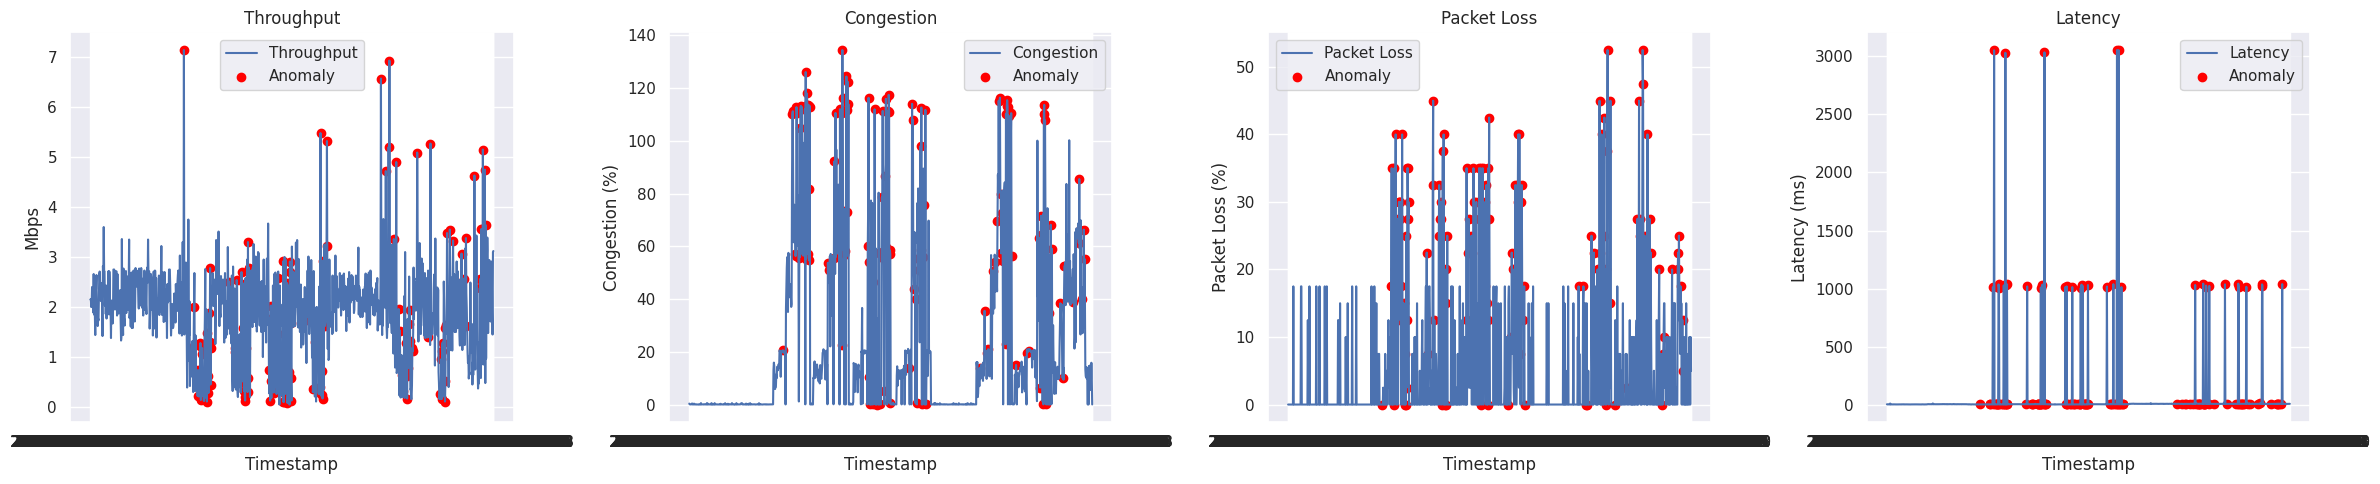

In [19]:
# Define an algorithm to use Tukey's approach to find outliers in a time series.
# Compute Q1 and Q3, the first and third quartiles.
# Do the interquartile range (IQR) calculation.
# Calculate the lower and upper limits using the scaling factor k and the IQR.
# Provide back a boolean mask that shows which data points are outliers.
def tukey_outliers(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper)

# If any of the chosen measures have Tukey-detected outliers, mark the anomalies.
# Use logical OR to combine anomaly conditions across all measurements.
# Create an integer representation of the result (1 for anomaly, 0 for normal).
dfanomoly['is_anomaly'] = (
    tukey_outliers(dfanomoly['throughput']) |
    tukey_outliers(dfanomoly['congestion']) |
    tukey_outliers(dfanomoly['packet_loss']) |
    tukey_outliers(dfanomoly['latency'])
).astype(int)

# Make four plots in a row to show each measure with anomalies found.
fig, axs = pltx.subplots(nrows=1, ncols=4, figsize=(24, 5))

# Plot the throughput over time, highlighting outliers in red.
# The throughput plot's title, labels, and legend should be set.
axs[0].plot(dfanomoly['timestamp'], dfanomoly['throughput'], label='Throughput')
axs[0].scatter(dfanomoly['timestamp'][dfanomoly['is_anomaly'] == 1], dfanomoly['throughput'][dfanomoly['is_anomaly'] == 1], color='red', label='Anomaly')
axs[0].set_title("Throughput")
axs[0].set_xlabel("Timestamp")
axs[0].set_ylabel("Mbps")
axs[0].legend()

# Show congestion over time with red highlights for outliers.
# The congestion plot's title, labels, and legend should be set.
axs[1].plot(dfanomoly['timestamp'], dfanomoly['congestion'], label='Congestion')
axs[1].scatter(dfanomoly['timestamp'][dfanomoly['is_anomaly'] == 1], dfanomoly['congestion'][dfanomoly['is_anomaly'] == 1], color='red', label='Anomaly')
axs[1].set_title("Congestion")
axs[1].set_xlabel("Timestamp")
axs[1].set_ylabel("Congestion (%)")
axs[1].legend()

# Plot packet loss with time and use red to indicate outliers.
# Configure the packet loss plot's title, labels, and legend.
axs[2].plot(dfanomoly['timestamp'], dfanomoly['packet_loss'], label='Packet Loss')
axs[2].scatter(dfanomoly['timestamp'][dfanomoly['is_anomaly'] == 1], dfanomoly['packet_loss'][dfanomoly['is_anomaly'] == 1], color='red', label='Anomaly')
axs[2].set_title("Packet Loss")
axs[2].set_xlabel("Timestamp")
axs[2].set_ylabel("Packet Loss (%)")
axs[2].legend()

# Plot latency across time, emphasising outliers in red.
# Create the latency plot's title, labels, and legend.
axs[3].plot(dfanomoly['timestamp'], dfanomoly['latency'], label='Latency')
axs[3].scatter(dfanomoly['timestamp'][dfanomoly['is_anomaly'] == 1], dfanomoly['latency'][dfanomoly['is_anomaly'] == 1], color='red', label='Anomaly')
axs[3].set_title("Latency")
axs[3].set_xlabel("Timestamp")
axs[3].set_ylabel("Latency (ms)")
axs[3].legend()

# Modify the layout to prevent plot overlaps.
pltx.tight_layout()

# Present the view of the merged anomaly.
pltx.show()


# **Combined Boxplot**

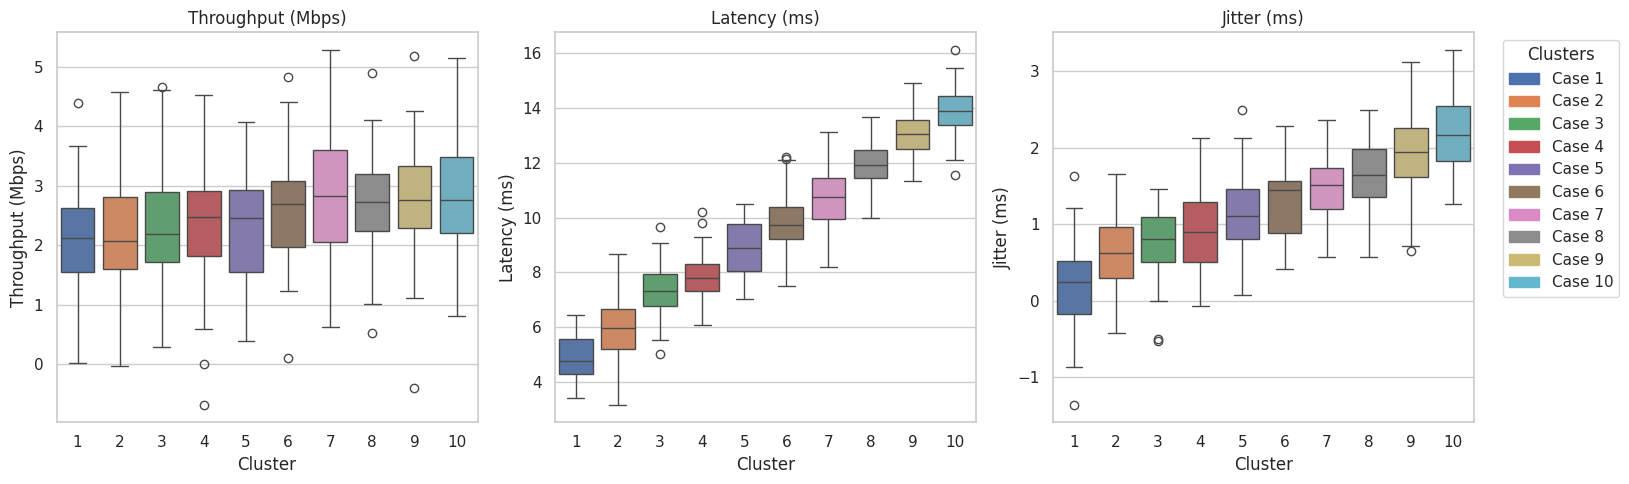

In [20]:
# Create cluster labels and set a seed for replication.
npx.random.seed(10)
clusters = npx.repeat(npx.arange(1, 11), 50)

# Generate synthetic throughput figures across clusters that are marginally higher.
throughput = npx.concatenate([npx.random.normal(loc=2 + i*0.1, scale=1, size=50) for i in range(10)])

# Produce a visible upward trend in latency figures for each cluster.
latency = npx.concatenate([npx.random.normal(loc=5 + i, scale=1, size=50) for i in range(10)])

# Produce jitter values that have a narrower range but also rise by cluster.
jitter = npx.concatenate([npx.random.normal(loc=0.3 + i*0.2, scale=0.5, size=50) for i in range(10)])

# Construct a single DataFrame consisting of all the produced data.
data = pdx.DataFrame({
    'Cluster': clusters,
    'Throughput (Mbps)': throughput,
    'Latency (ms)': latency,
    'Jitter (ms)': jitter
})

# Give each seaborn plot a neat grid design.
sns.set(style="whitegrid")

# For the metrics, make a row of three subplots.
fig, axes = pltx.subplots(1, 3, figsize=(15, 5))

# For each of the ten clusters, create a distinct colour scheme.
colors = sns.color_palette(n_colors=10)

# Create a boxplot that is organised by cluster after looping through each statistic.
# Change each subplot's title to reflect the appropriate measure.
for i, metric in enumerate(['Throughput (Mbps)', 'Latency (ms)', 'Jitter (ms)']):
    sns.boxplot(x='Cluster', y=metric, data=data, ax=axes[i], palette=colors)
    axes[i].set_title(metric)

# Plot spacing should be optimised.
pltx.tight_layout()

# For every cluster group, create a unique legend label.
legend_labels = [f'Case {i}' for i in range(1, 11)]

# Then, create coloured legend handles that correspond to the cluster colours.
legend_handles = [Patch(color=colors[i], label=legend_labels[i]) for i in range(10)]

# Add a title and placement to the legend in the last subplot.
axes[2].legend(handles=legend_handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Completing the visualisation
pltx.show()


# **Applied pre processing**


In [21]:
# Set up the instance of LabelEncoder.
label_encoder = LabelEncoder()

# Add numeric labels to the 'Routers' column.
dfanomoly['Routers'] = label_encoder.fit_transform(dfanomoly['Routers'])

# The 'Planned route' field should be encoded in numeric format.
dfanomoly['Planned route'] = label_encoder.fit_transform(dfanomoly['Planned route'])

# To ensure model readiness, encode the 'Network measure' column.
dfanomoly['Network measure'] = label_encoder.fit_transform(dfanomoly['Network measure'])

# Enter numeric numbers in the 'Network target' field.
dfanomoly['Network target'] = label_encoder.fit_transform(dfanomoly['Network target'])

# Show the modified DataFrame's first few rows.
dfanomoly.head()

,timestamp,bandwidth,throughput,congestion,packet_loss,latency,jitter,Routers,Planned route,Network measure,Network target,Video target,Percentage video occupancy,Bitrate video,Number videos,throughput_class,cluster,is_anomaly
0,2024-05-11 12:00:15,2,2.15,0.38,0.0,6.58,0.52,1,0,0,0,NaN,0,0,0,1,0,0
1,2024-05-11 12:00:43,2,2.16,0.12,0.0,5.36,0.34,1,0,0,0,NaN,0,0,0,1,0,0
2,2024-05-11 12:01:12,2,2.00,0.08,0.0,6.29,0.23,1,0,0,0,NaN,0,0,0,1,0,0
3,2024-05-11 12:01:40,2,2.07,0.07,0.0,5.91,0.51,1,0,0,0,NaN,0,0,0,1,0,0
4,2024-05-11 12:02:08,2,2.40,0.08,0.0,5.81,0.71,1,0,0,0,NaN,0,0,0,1,0,0


# **target variable**

In [22]:
# List every column in the DataFrame that has numbers.
numeric_cols = dfanomoly.select_dtypes(include=npx.number).columns.tolist()

# To use it as the goal, take the 'throughput' column out of the list.
numeric_cols.remove('throughput')

# Choose every last numeric column to define the feature set.
X = dfanomoly[numeric_cols]

# Make the 'throughput' column the variable of interest.
y = dfanomoly['throughput']

# **Spliting the dataset into train and test**

In [23]:
# Divide the data using 'throughput_class' as the target into training and testing sets for classification.
Xtrainclassanm, Xtestclassanm, ytrainclassanm, ytestclassanm = train_test_split(X, dfanomoly['throughput_class'], test_size=0.2, random_state=42)

# **Applied SVM model -1**

In [24]:
# Set up the SVM classifier using certain hyperparameters.
svm_model = svm.SVC(
    C=1500,                # C=1500: Control classification bias while emphasising a larger margin
    kernel='rbf',          # kernel='rbf': For non-linear separation, use the radial basis function kernel.
    gamma=0.0015,          # gamma=0.0015: Describe the extent to which a single training point has an impact.
    coef0=0.0,             # Coef0 = 0.0: polynomial/sigmoid kernel coefficient (not used here)
    cache_size=1000,       # Cache_size=1000: Set aside RAM for the kernel's processing.
    max_iter=-1,           # max_iter = -1: Until convergence, let an infinite number of iterations.
    probability=True,      # probability=True: Turn on probability estimates for classification
    random_state=25,       # random_state=25: Make sure the results are repeatable
    class_weight='balanced'  # class_weight='balanced': Automatically modify weights for classes that are out of balance
)

# Utilise the training data to train the SVM model.
svm_model.fit(Xtrainclassanm, ytrainclassanm)

SVC(C=1500, cache_size=1000, class_weight='balanced', gamma=0.0015,
    probability=True, random_state=25)

# **Testing Result**

In [25]:
# Make class predictions on the test set using the learnt SVM model.
y_pred_class = svm_model.predict(Xtestclassanm)

# Determine the model's classification
accuracy = accuracy_score(ytestclassanm, y_pred_class)
precision = precision_score(ytestclassanm, y_pred_class, average='weighted')
recall = recall_score(ytestclassanm, y_pred_class, average='weighted')
f1 = f1_score(ytestclassanm, y_pred_class, average='weighted')

# Present SVM classification assessment metrics.
print("SVM Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Determine the quantity of anticipated anomalies (class 0).
predicted_anomalies = npx.sum(y_pred_class == 0)

# Find out how many occurrences there are in the entire test set.
total_test_instances = len(ytestclassanm)

# Figure out what proportion of cases are expected to be anomalies.
percentage_anomalies = (predicted_anomalies / total_test_instances) * 100

# Show the proportion of expected anomalies based on the SVM model.
print(f"\nPercentage of predicted anomalies of svm model: {percentage_anomalies:.2f}%")

SVM Classification Results:
Accuracy: 0.9303
Precision: 0.9308
Recall: 0.9303
F1-score: 0.9267

Percentage of predicted anomalies of svm model: 15.92%


# **Applied RandomForest model -2**

In [53]:
# used random forests model and fit the train test
rf_model = RandomForestClassifier(
    n_estimators=3,        # Very few trees
    max_depth=2,           # Very shallow trees
    max_features=1,        # Only one feature per split
    min_samples_split=20,  # Require more samples to split
    min_samples_leaf=10,   # Require more samples per leaf
    max_samples=0.2,       # Each tree sees only 20% of the data
    random_state=49,
    n_jobs=6,
    criterion='gini'
)

# Utilise the training  data to train the Random Forest model.
rf_model.fit(Xtrainclassanm, ytrainclassanm)

RandomForestClassifier(max_depth=2, max_features=1, max_samples=0.2,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=3, n_jobs=6, random_state=49)

# **Testing result**

In [54]:
# Use the trained Random Forest model to make predictions on the test set.
y_pred_rf_class = rf_model.predict(Xtestclassanm)

# Determine the model's overall accuracy
accuracy_rf = accuracy_score(ytestclassanm, y_pred_rf_class)
# Determine weighted precision to take into consideration the distribution of classes
precision_rf = precision_score(ytestclassanm, y_pred_rf_class, average='weighted')
# Determine weighted recall to assess sensitivity across all classes
recall_rf = recall_score(ytestclassanm, y_pred_rf_class, average='weighted')
# Determine weighted F1-score as a reasonable combination of precision and recall
f1_rf = f1_score(ytestclassanm, y_pred_rf_class, average='weighted')

# Show the Random Forest model's categorisation performance numbers.
print("Random Forest Classification Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Determine how many forecasts were found to be anomalies (class 0).
predicted_anomalies_rf = npx.sum(y_pred_rf_class == 0)

# Find out how many test instances there are overall.
total_test_instances_rf = len(ytestclassanm)

# Determine the test set's projected anomaly percentage.
percentage_anomalies_rf = (predicted_anomalies_rf / total_test_instances_rf) * 100

# Output the proportion of anomalies found by the Random Forest classifier.
print(f"\nPercentage of predicted anomalies of Random Forest model: {percentage_anomalies_rf:.2f}%")

Random Forest Classification Results:
Accuracy: 0.9104
Precision: 0.9196
Recall: 0.9104
F1-score: 0.9006

Percentage of predicted anomalies of Random Forest model: 11.94%


# **Model comparision of Svm and Randomforest**

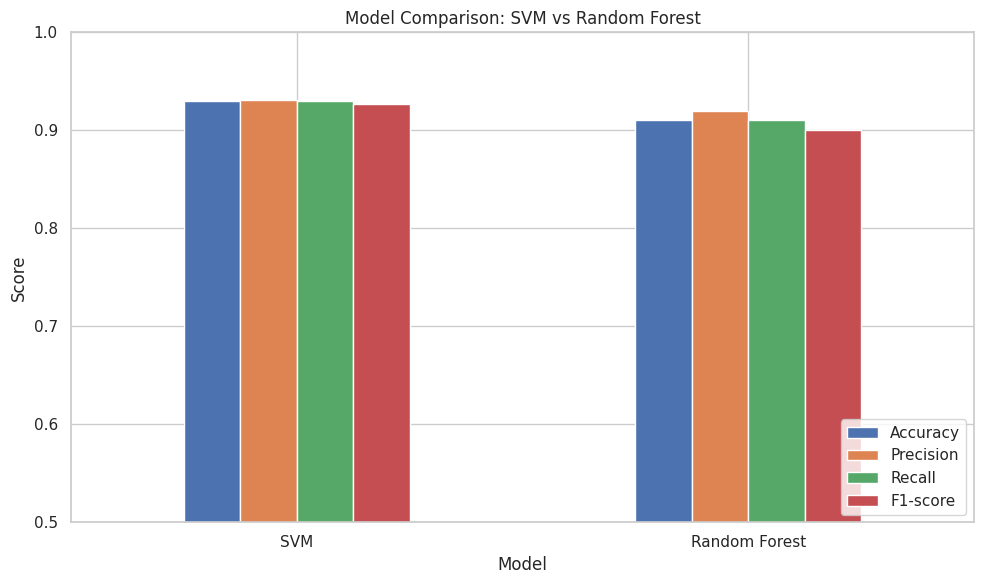

In [55]:
# Construct a DataFrame to hold each model's assessment metrics.
results = pdx.DataFrame({
    'Model': ['SVM', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_rf],
    'Precision': [precision, precision_rf],
    'Recall': [recall, recall_rf],
    'F1-score': [f1, f1_rf]
})

# Create a bar plot that contrasts SVM with Random Forest using the 'Model' column as the index.
results.set_index('Model').plot(kind='bar', figsize=(10, 6))

# To provide context, give the bar chart a title.
pltx.title('Model Comparison: SVM vs Random Forest')

# Indicate the metric score by labelling the y-axis.
pltx.ylabel('Score')

# Model names should be kept horizontal for easier reading.
pltx.xticks(rotation=0)

# In the lower right area, place the legend.
pltx.legend(loc='lower right')

# To make comparisons easier, restrict the y-axis to a particular score range.
pltx.ylim([0.5, 1.0])

# To prevent clipping, change the layout spacing.
pltx.tight_layout()

# Show the completed comparison chart.
pltx.show()

# **SHAP example with non anomaly data.**

In [56]:
# Pick the precise test case to describe using the index.
data_point_index = 0

# Retrieve the associated feature values for the instance that was chosen.
instance_to_explain = Xtestclassanm.iloc[[data_point_index]]

# Define background data for the SHAP KernelExplainer. Using a small sample of the training data is a common practice.
# Use a subset of the training data directly as the background data
background_data = Xtrainclassanm.sample(n=100, random_state=42)


# Use the SVM model's probability predictions and background data to initialise a SHAP KernelExplainer.
explainer = shap.KernelExplainer(svm_model.predict_proba, background_data)

# Calculate the chosen instance's SHAP values.
shap_values = explainer.shap_values(instance_to_explain)

# Particularly extract SHAP values for class 0.
shap_values_for_class_0 = shap_values[0][:, 0]

# Obtain the model output (anticipated base value) for class 0 in the SHAP force plot.
expected_value = explainer.expected_value[0]

# Make JavaScript available for interactive visualisations.
shap.initjs()

# Create a SHAP force plot to illustrate the given instance's forecast.
shap.plots.force(expected_value, shap_values_for_class_0, instance_to_explain.iloc[0], feature_names=Xtestclassanm.columns)

  0%|          | 0/1 [00:00<?, ?it/s]